<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/RNN_f_long.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 関数の定義

In [0]:
import numpy as np

def f(t, freq=100):
    return np.sin(2. * np.pi * t / freq)

def g(t, freq=100, amp=10, threshold = 10):
    return 1/(1 + np.exp(10 * np.sin(2 * np.pi * t / freq) + 10))

def h(t, freqs=[11, 23, 31, 41, 53, 61, 71, 83, 97]):
    value = np.zeros_like(t)
    for freq in freqs:
        value += f(t, freq)
    return value

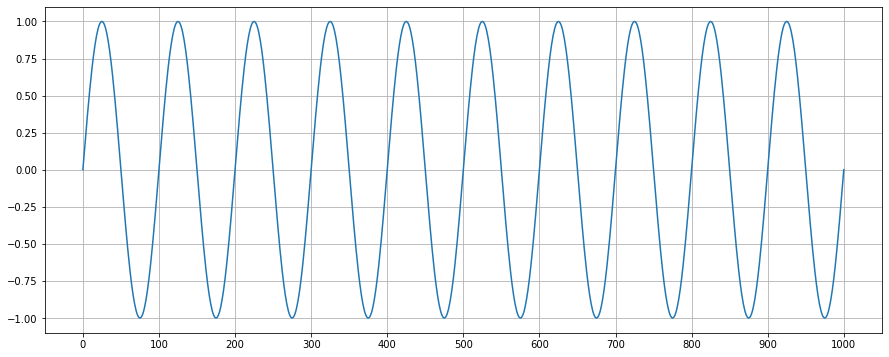

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 1000
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(f(times))
plt.xticks(np.linspace(0, 1000, 11))
plt.grid()

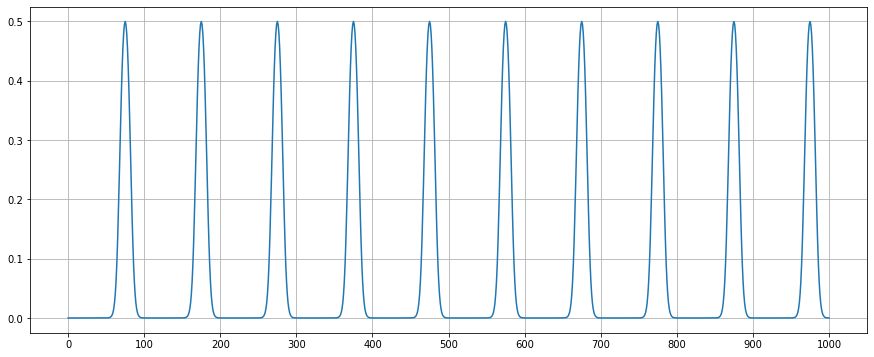

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 1000
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(g(times))
plt.xticks(np.linspace(0, 1000, 11))
plt.grid()

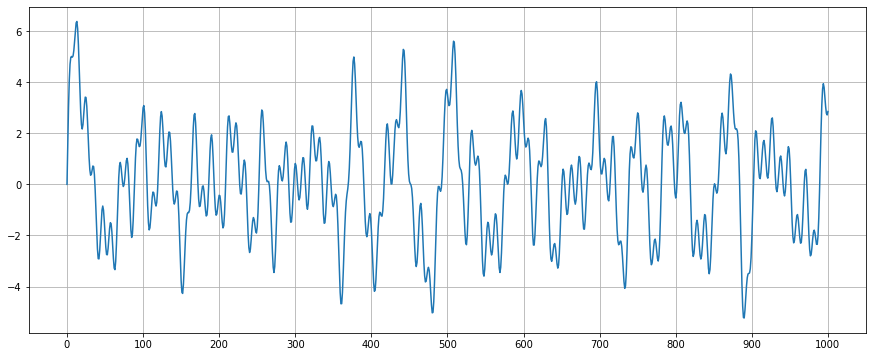

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 1000
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(h(times))
plt.xticks(np.linspace(0, 1000, 11))
plt.grid()

# 関数のフーリエ変換

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero e

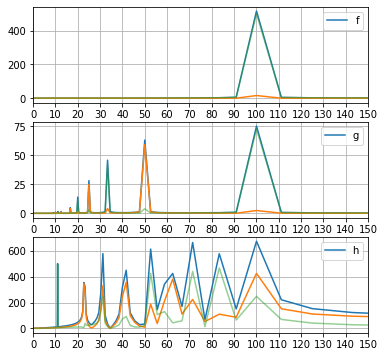

In [0]:
plt.figure(figsize=(6,6))

sp = np.fft.fft(f(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(311)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="f")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(g(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(312)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="g")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(h(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(313)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="h")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

# 時系列データセットの作成

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

func = f

total_time_length = 10000
pred_length = 1000
learning_time_length = 100
time_series_T = np.linspace(0, total_time_length, total_time_length + 1)
time_series_X = func(time_series_T)

X_learn = []
Y_learn = []
for i in range(total_time_length - learning_time_length):
    X_learn.append(time_series_X[i:i+learning_time_length].reshape(1, learning_time_length).T)
    Y_learn.append([time_series_X[i+learning_time_length]])

X_train, X_val, Y_train, Y_val = \
train_test_split(X_learn, Y_learn, test_size=0.2, shuffle=False)

X_train2sklearn = [list(x.reshape(1, len(x))[0]) for x in X_train]
Y_train2sklearn = [y[0] for y in Y_train]

# 多層パーセプトロン(scikit-learn)

In [0]:
%%time
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(100, 100, 100), 
                         early_stopping=True, max_iter=10000) # 回帰器の生成
regressor.fit(X_train2sklearn, Y_train2sklearn) # 学習

CPU times: user 3.14 s, sys: 1.52 s, total: 4.67 s
Wall time: 2.43 s


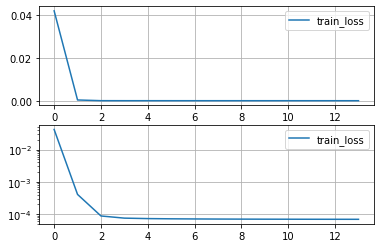

In [0]:
plt.plot(regressor.loss_curve_)
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(regressor.loss_curve_, label='train_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(regressor.loss_curve_, label='train_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
pred_length = 1000
X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = [Y_pred[i:i+learning_time_length]]
    Y_ = regressor.predict(X_)
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 376 ms, sys: 277 ms, total: 653 ms
Wall time: 336 ms


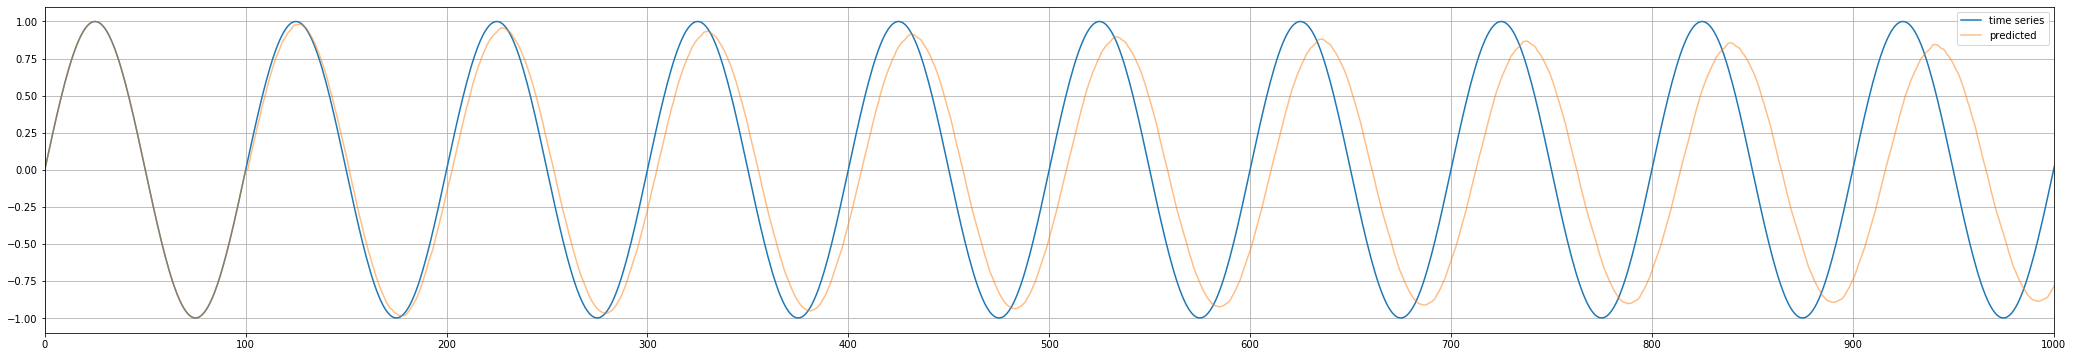

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


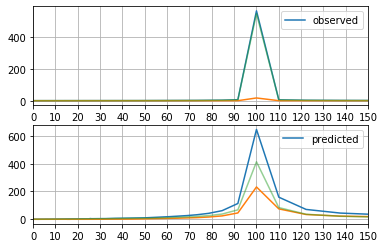

In [0]:
plt.figure(figsize=(6,4))

sp = np.fft.fft(func(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(211)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="observed")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(212)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="predicted")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

# PyTorch で再帰的ニューラルネットワーク

In [0]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## RNN

In [0]:
import torch
class RNN(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.RNN(1, hidden_dim,
                         nonlinearity='tanh',
                         batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## LSTM

In [0]:
import torch
class LSTM(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.LSTM(1, hidden_dim, batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## GRU

In [0]:
import torch
class GRU(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.GRU(1, hidden_dim, batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## EarlyStopping

In [0]:
def EarlyStopping(log, patience=20):
    if len(log) <= patience:
        return False
    min1 = log[:len(log)-patience].min()
    min2 = log[len(log)-patience:].min()
    if min1 <= min2:
        return True
    else:
        return False

## RNN の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = RNN(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 1000
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 0.06789647953663892 Val loss: 0.0002875126083381474
Epoch: 2 Train loss: 0.00013920128633169673 Val loss: 6.381593993864954e-05
Epoch: 3 Train loss: 6.56880094352229e-05 Val loss: 4.326290581957437e-05
Epoch: 4 Train loss: 4.555230188065579e-05 Val loss: 7.244785956572741e-05
Epoch: 5 Train loss: 4.986222654387791e-05 Val loss: 2.176081579818856e-05
Epoch: 6 Train loss: 3.793237696159989e-05 Val loss: 4.644263390218839e-05
Epoch: 7 Train loss: 2.7199198951002938e-05 Val loss: 1.3188603588787373e-05
Epoch: 8 Train loss: 2.677884627607851e-05 Val loss: 1.4265149729908444e-05
Epoch: 9 Train loss: 2.0815164017944764e-05 Val loss: 3.514010313665494e-05
Epoch: 10 Train loss: 1.6293987125838892e-05 Val loss: 1.7071914044208825e-05
Epoch: 11 Train loss: 1.5011814901719425e-05 Val loss: 2.524209958210122e-05
Epoch: 12 Train loss: 1.855258427988305e-05 Val loss: 8.826197699818294e-06
Epoch: 13 Train loss: 1.0286612730571785e-05 Val loss: 6.455325092247222e-06
Epoch: 14 Train

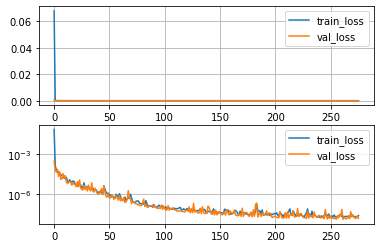

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 2.85 s, sys: 10.9 ms, total: 2.86 s
Wall time: 2.88 s


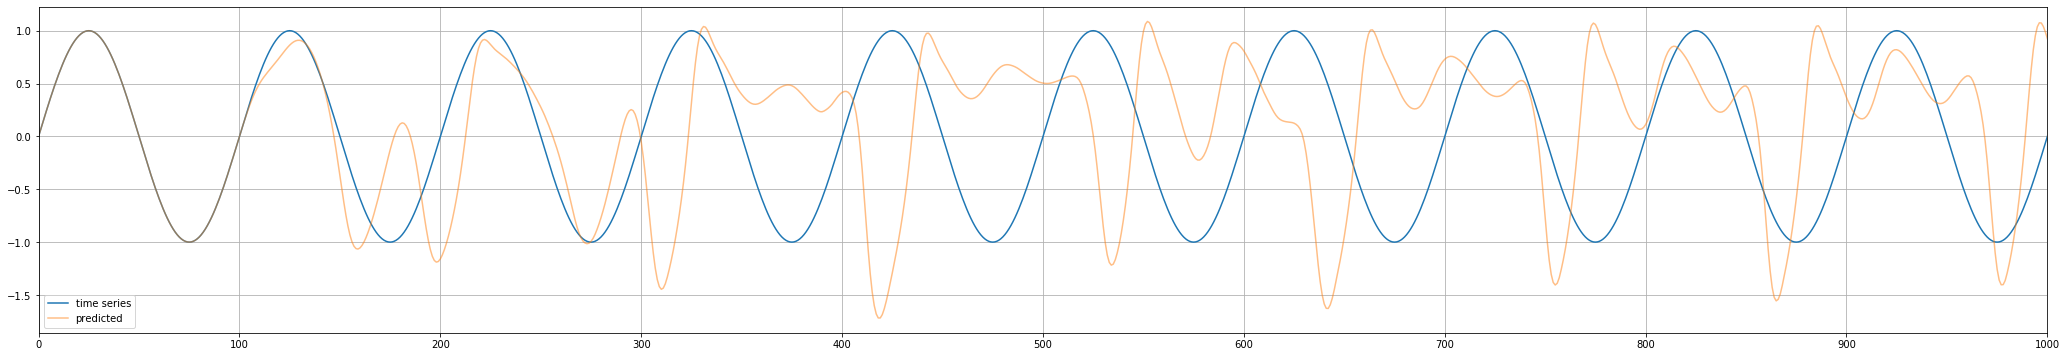

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


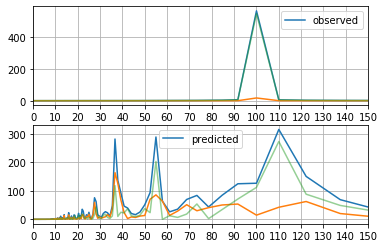

In [0]:
plt.figure(figsize=(6,4))

sp = np.fft.fft(func(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(211)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="observed")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(212)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="predicted")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

## LSTM の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = LSTM(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 1000
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 0.16900650775418258 Val loss: 0.006120486184954643
Epoch: 2 Train loss: 0.0010457997356216088 Val loss: 6.777566159144044e-05
Epoch: 3 Train loss: 2.1805181019702173e-05 Val loss: 1.012843131320551e-05
Epoch: 4 Train loss: 8.902250282260819e-06 Val loss: 8.366760084754787e-06
Epoch: 5 Train loss: 7.549598456954789e-06 Val loss: 6.667990874120733e-06
Epoch: 6 Train loss: 6.3386541907489e-06 Val loss: 5.5308546507149e-06
Epoch: 7 Train loss: 5.198225704379393e-06 Val loss: 4.7851881390670314e-06
Epoch: 8 Train loss: 4.486385857186785e-06 Val loss: 4.042167802253971e-06
Epoch: 9 Train loss: 3.78477418158022e-06 Val loss: 3.3872422591230134e-06
Epoch: 10 Train loss: 3.3024642556110616e-06 Val loss: 3.4139600302296458e-06
Epoch: 11 Train loss: 2.8285508226242828e-06 Val loss: 2.4840253445290728e-06
Epoch: 12 Train loss: 2.4447739668595695e-06 Val loss: 2.230704694738961e-06
Epoch: 13 Train loss: 2.1880164415331538e-06 Val loss: 1.9010418554898934e-06
Epoch: 14 Train los

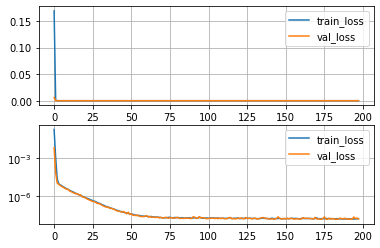

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 8.56 s, sys: 11 ms, total: 8.58 s
Wall time: 8.58 s


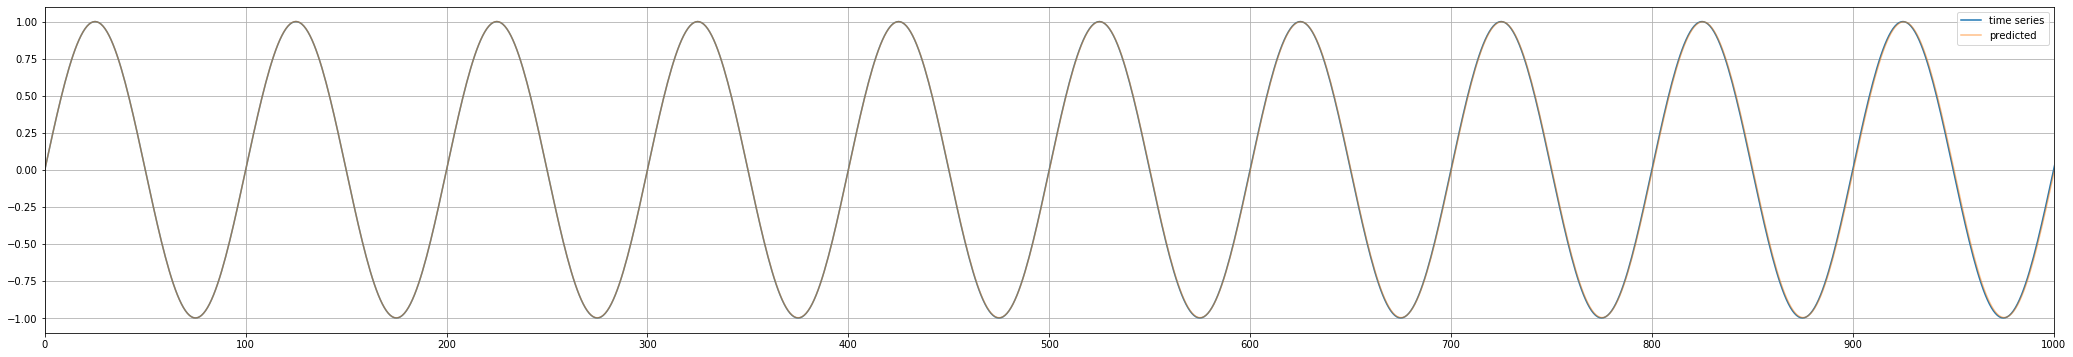

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


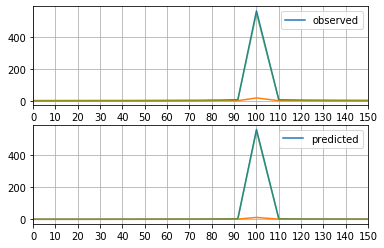

In [0]:
plt.figure(figsize=(6,4))

sp = np.fft.fft(func(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(211)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="observed")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(212)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="predicted")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

## GRU の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = GRU(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 1000
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 0.1087062562791965 Val loss: 0.011798538267612457
Epoch: 2 Train loss: 0.0036471595507091246 Val loss: 9.625118400435895e-05
Epoch: 3 Train loss: 6.014087492262777e-05 Val loss: 4.993023321731016e-05
Epoch: 4 Train loss: 4.489226282599609e-05 Val loss: 3.8650479837087914e-05
Epoch: 5 Train loss: 3.39442998059288e-05 Val loss: 2.930477785412222e-05
Epoch: 6 Train loss: 2.5094932588660577e-05 Val loss: 2.099033008562401e-05
Epoch: 7 Train loss: 1.8428681974350744e-05 Val loss: 1.5759884263388813e-05
Epoch: 8 Train loss: 1.3697806445214575e-05 Val loss: 1.145940950664226e-05
Epoch: 9 Train loss: 1.04391055325929e-05 Val loss: 9.139065696217585e-06
Epoch: 10 Train loss: 7.528886353378393e-06 Val loss: 6.38715800960199e-06
Epoch: 11 Train loss: 5.479567641067171e-06 Val loss: 4.806615379493451e-06
Epoch: 12 Train loss: 3.954060596301227e-06 Val loss: 3.330414529045811e-06
Epoch: 13 Train loss: 2.9701220916113248e-06 Val loss: 2.4567366381234024e-06
Epoch: 14 Train loss:

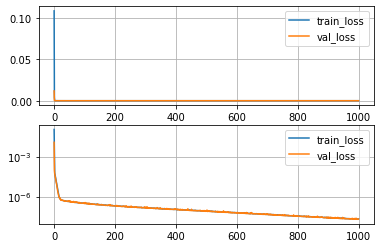

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 10.2 s, sys: 10 ms, total: 10.2 s
Wall time: 10.2 s


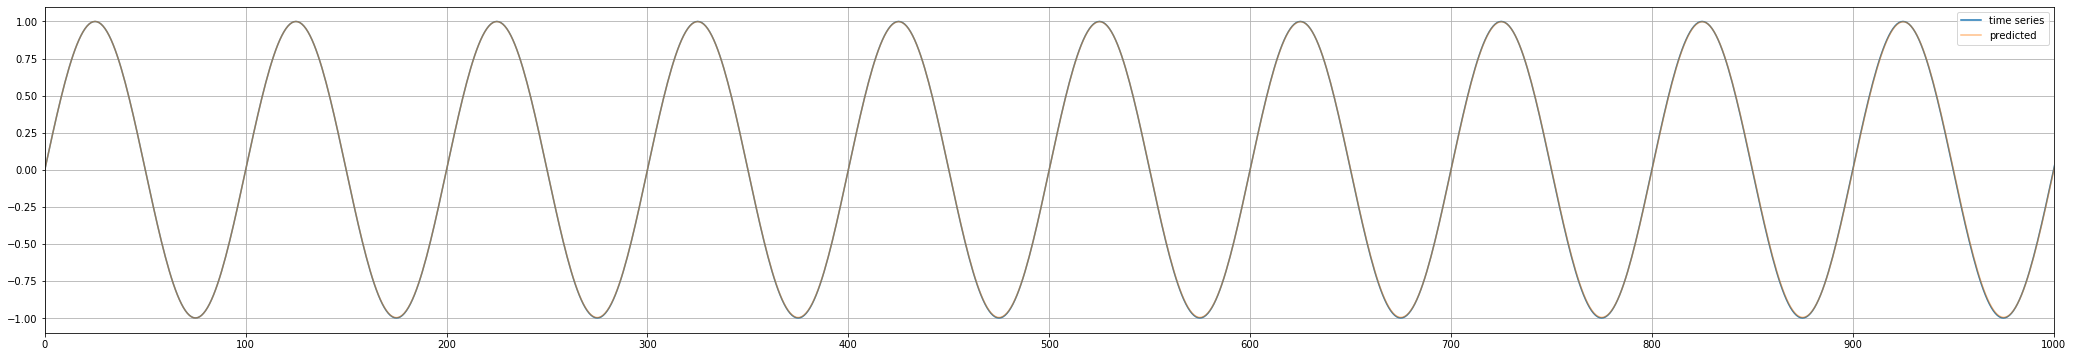

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


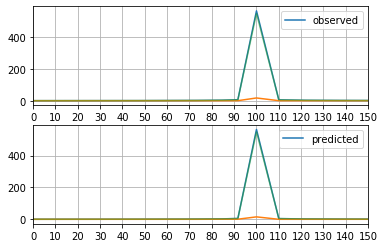

In [0]:
plt.figure(figsize=(6,4))

sp = np.fft.fft(func(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(211)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="observed")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(212)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="predicted")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()